In [41]:
import os
import pystan
import seaborn as sns
import pandas as pd
from math import exp, cos, pi, log
import numpy as np

In [42]:
code2='''
data {
    int i;
    int j;
    matrix[i,j] numbers;
    matrix[i,j] known;
    
}
parameters { 
    real slope;
    real intercept[i];
    real val;
    matrix[i,j] res;
}
model {
    slope ~ normal(5,10);
    for (c in 1:i){
        intercept[c] ~ normal(0,10);
    }
    val ~ inv_gamma (3,0.1);
    for (c in 1:i){
        if ((known[c,1] *known[c,2])!=1){
        res[c] ~ normal(numbers[c] * slope + intercept[c],val);
        }
    }
}
'''
sm = pystan.StanModel(model_code=code2)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_c96b7d1f2e978753453a222fb07b3e09 NOW.


In [43]:
numbers=[[1,2],[11,12],[21,22],[31,32],[41,42],[51,52],[61,62],[71,72],[81,82],[91,92]]
known=np.zeros((10,2))
for i in range(0,2):
    for j in range(0,10):
        if numbers[j][i]=="NaN":
            known[j][i]=1

In [44]:
data = dict( i=10,
            j=2,
            numbers=numbers,
            known=known

)
fit = sm.sampling(data=data, iter=1500, chains=1,thin=1)
op = fit.extract()

In [45]:
print(op.keys())
print(len(op["slope"]))

odict_keys(['slope', 'intercept', 'val', 'res', 'lp__'])
750


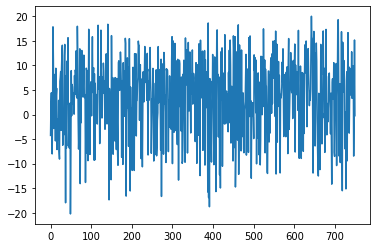

In [46]:
show_op=op['intercept'][:,1:2].reshape(750)
sns.lineplot(x=range(0,750),y=show_op)


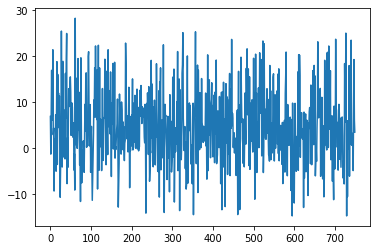

In [47]:
show_op=op['intercept'][:,2:3].reshape(750)
sns.lineplot(x=range(0,750),y=show_op)

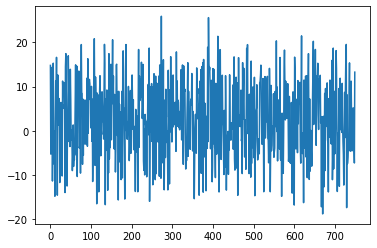

In [48]:
show_op=op['intercept'][:,3:4].reshape(750)
sns.lineplot(x=range(0,750),y=show_op)

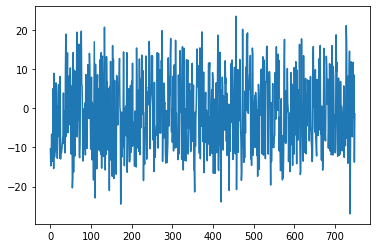

In [49]:
show_op=op['intercept'][:,4:5].reshape(750)
sns.lineplot(x=range(0,750),y=show_op)

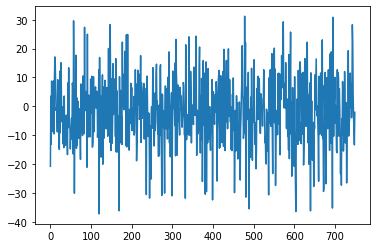

In [50]:
show_op=op['intercept'][:,5:6].reshape(750)
sns.lineplot(x=range(0,750),y=show_op)

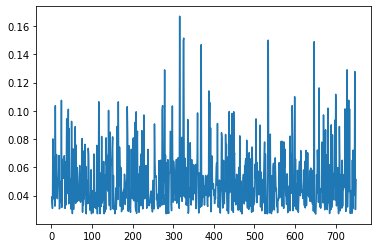

In [51]:
sns.lineplot(x=range(1,751),y=op['val'])